In [1]:
import sys
sys.path.append('..')
import cortex_etl as c_etl

ma = c_etl.analysis_initial_processing("../configs/6-O1-MPScan/6-O1-MPScan-0-5x3x2.yaml") #, loglevel="ERROR"

FileNotFoundError: [Errno 2] No such file or directory: '../../configs/2-PfrTransfer/2-PfrTransfer-6-3rdConnectionRemaining.yaml'

In [3]:
a_soma = ma.soma
a_spikes = ma.hex0_spikes

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

soma_stats_with_sim_info = pd.merge(a_soma.features.by_neuron_class_v2.df.reset_index(), a_soma.repo.simulations.df, on='simulation_id')
soma_stats_with_sim_info = soma_stats_with_sim_info.etl.q(neuron_class=c_etl.LAYER_EI_NEURON_CLASSES)

soma_stats_with_sim_info.loc[:, 'layer_string'] = soma_stats_with_sim_info.apply(lambda row: c_etl.NEURON_CLASS_LAYERS_AND_SYNAPSE_CLASSES[row['neuron_class']]['layer_string'], axis = 1)
soma_stats_with_sim_info.loc[:, 'synapse_class'] = soma_stats_with_sim_info.apply(lambda row: c_etl.NEURON_CLASS_LAYERS_AND_SYNAPSE_CLASSES[row['neuron_class']]['synapse_class'], axis = 1)

c_etl.lineplot(soma_stats_with_sim_info, "mean", "figures/soma/soma_mean", hor_key="layer_string", ver_key="synapse_class", x_key="desired_connected_proportion_of_invivo_frs", colour_var_key="depol_stdev_mean_ratio", linestyle_key="ca", mask_key="", highlight_false_key="", marker='x', custom_ylim=[], remove_intermediate_labels=False, autosize_scaling_factor=3)
c_etl.lineplot(soma_stats_with_sim_info, "std", "figures/soma/soma_std", hor_key="layer_string", ver_key="synapse_class", x_key="desired_connected_proportion_of_invivo_frs", colour_var_key="depol_stdev_mean_ratio", linestyle_key="ca", mask_key="", highlight_false_key="", marker='x', custom_ylim=[], remove_intermediate_labels=False, autosize_scaling_factor=3)

Create lineplot: mean
['layer_string', 'synapse_class', 'desired_connected_proportion_of_invivo_frs', 'depol_stdev_mean_ratio', 'ca', 'mean']
Create lineplot: std
['layer_string', 'synapse_class', 'desired_connected_proportion_of_invivo_frs', 'depol_stdev_mean_ratio', 'ca', 'std']


In [19]:
soma_df_copy = a_soma.repo.report.df.etl.q(neuron_class=c_etl.LAYER_EI_NEURON_CLASSES, window='w1').copy()
soma_df_copy = soma_df_copy.etl.q(simulation_id=9)

In [ ]:
for gid in soma_df_copy.etl.q(neuron_class='L6_EXC').gid.unique():
    neuron_soma = soma_df_copy.etl.q(gid=gid)
    
    plt.figure()
    for simulation_id in neuron_soma.simulation_id.unique():
        sim_neuron_soma = neuron_soma.etl.q(simulation_id=simulation_id)

        plt.plot(sim_neuron_soma['time'], sim_neuron_soma['value'])
        
    plt.gca().set_ylim([-75.0, -55.0])

In [20]:
import numpy as np

soma_df_copy = soma_df_copy.etl.q(neuron_class=['L5_EXC', 'L5_INH', 'L6_EXC', 'L6_INH'])

gid_spikes = a_spikes.repo.report.df.etl.q(window='w1', simulation_id=9, neuron_class=['L5_EXC', 'L5_INH', 'L6_EXC', 'L6_INH'])
soma_gids = soma_df_copy.etl.q(neuron_class=['L5_EXC', 'L5_INH', 'L6_EXC', 'L6_INH']).gid.unique()

for gid in gid_spikes.gid.unique():
    if gid in soma_gids:
        print(gid)
        gid_soma = soma_df_copy.etl.q(gid=gid)

        for _, spike in gid_spikes.iterrows():
            where_spike = gid_soma.etl.q({"time": {"ge": spike['time'] - 25.0, "le": spike['time'] + 25.0}}).index
            if len(where_spike):
                soma_df_copy.loc[where_spike, 'value'] = np.nan

#     plt.figure()
#     plt.plot(gid_soma['time'], gid_soma['value'])




4127264
3616452
3798706
3694822
3992779
3983886
4025661
4142580
4048463
4191777
3550774
3446254
4095992
3682718
3810132
4076434
4102386
3528696
3634113
3868502
3816757
3967866
3713336
4015929
3761614
3655171
4105127
3447096
3941847
3993908
3530238
3666861
3694252
3671259
3824515
3592147
3591440
3591737
3493057
3480757
3576551
3586925
4210991
3481506
3510960
3603025
4218390
3591191
3595584
3595934
3508122
3584842
3512847
3573429
3591067
4229218
3509716
4217493
3577632
4220700
3507656
3599926
3562680
3597652
3503852
3575179
3483203
3583129
3490342
3488311
3593958
3493315
3486099
3472959
3563975
3567581
3499737
3568183
3496008
3488763
1872946
1766988
1469510
2023238
1854373
2145865
1981889
1559629
1818442
2096657
1640163
1424826
807624
2048567
2103593
2018812
1723875
1113396
1724717
1997610
1108989
1121407
1721410
1107579
1132127
1364215
1407814
1723595
1113305
1385542
1372563
1402352
1366394
2192396
1398233
963642
2199685
1392886
2197114
2185525
2190870
1377362
2196191
1995797
1384641
11

/nvme/isbister/1462278/ipykernel_294663/3398179233.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_potentials = soma_df_copy.etl.q(neuron_class=['L6_EXC', 'L6_INH']).groupby(['time']).mean().reset_index()


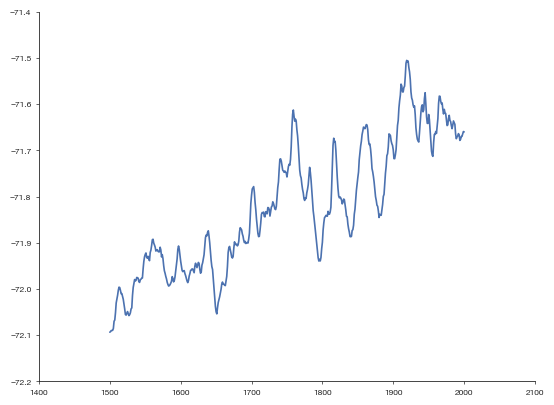

In [21]:
mean_potentials = soma_df_copy.etl.q(neuron_class=['L5_EXC', 'L5_INH', 'L6_EXC', 'L6_INH']).groupby(['time']).mean().reset_index()

plt.figure()
plt.plot(mean_potentials['time'], mean_potentials['value'])